# Hina's Data Analysis

To answer the question "What is the best neighborhood in Pittsburgh?" we are determining which neighborhood is the most alien invarient :D
<br> I'll use the amount of speed humps and the total field area for each neighborhood to measure how easy it is to run away from the aliens and set up camp, respectively. 

## Speed Humps
City of Pittsburgh Speed Humps: https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps
<br> This data set lists each recorded speed hump in the city of Pittsburgh with which neighborhood they're located in.
<br> We'll find the neighborhood with the most amount of speed humps as the more speed humps there are, the more the alien's vehicle will be slowed down 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
speedBumps = pd.read_csv("speedBumps.csv")
speedBumps.sample(10)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
21,504225575,26,3716.0,Melwood Ave,14629,Asphalt,Polish Hill,7,6,42003060500,6,6,2,2-6,40.460015,-79.958252
63,1233595442,64,2105.0,Mission St,18058,Asphalt,South Side Slopes,3,16,42003160800,3,16,3,4-24,40.423281,-79.975414
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
53,494800222,54,1761.0,Parkview Blvd,20126,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-20,40.416255,-79.920802
66,1237386520,67,2512.0,Mission St,15541,Asphalt,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.422768,-79.971155
31,1446333174,32,236.0,Grandview Ave,9528,Asphalt,Mount Washington,2,19,42003191400,5,19,3,4-27,40.432651,-80.008690
47,586776709,48,2150.0,Beechwood Blvd,19509,Asphalt,Squirrel Hill South,5,14,42003140800,3,14,4,2-21,40.434943,-79.912392
17,1766344814,22,3628.0,Melwood Ave,15250,Asphalt,Polish Hill,7,6,42003060500,6,6,2,2-6,40.459752,-79.959536
9,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611
39,905381373,40,NaN,Boundary St,4523,NaN,North Oakland,8,14,42003140100,3,14,4,2-8,40.443192,-79.947667


First, let's see which neighborhoods have speed humps listed in the data set

In [4]:
speedBumpsneighborhoods = speedBumps['neighborhood'].unique()
print(speedBumpsneighborhoods)
len(speedBumpsneighborhoods)

['Squirrel Hill South' 'North Oakland' 'Brookline' 'Bloomfield'
 'Polish Hill' 'Homewood South' 'Mount Washington' 'South Side Flats'
 'Central Oakland' 'Squirrel Hill North' 'Upper Hill' 'Highland Park'
 'Carrick' 'Perry North' 'South Side Slopes' 'Garfield' 'Stanton Heights'
 'Overbrook']


18

We have 18 neighborhoods listed in the dataset.

Now let's count the speed humps that each neighborhood has:

Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
South Side Slopes       4
Brookline               4
Upper Hill              4
Homewood South          4
Perry North             4
Squirrel Hill North     3
South Side Flats        3
Mount Washington        3
Garfield                3
Bloomfield              3
Highland Park           2
Central Oakland         1
Overbrook               1
Stanton Heights         1
Name: neighborhood, dtype: int64


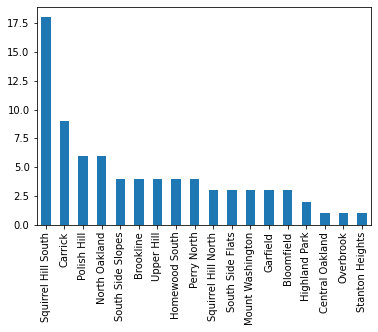

In [6]:
speedBumpsPerNeighborhood = speedBumps['neighborhood'].value_counts()
print(speedBumpsPerNeighborhood)
speedBumpsPerNeighborhood.plot(x='Neighborhoods in Pittsburgh', y='Number of Speedbumps', kind='bar')

It looks like with this metric, Squirrel Hill South is the best neighborhood to be in when aliens are chasing you :D

## Field Area

City of Pittsburgh Playing Fields: https://data.wprdc.org/dataset/playing-fields
<br>This data set lists each recorded playing field in the city of Pittsburgh with which neighborhood they're located in and the field measurements of each.
<br>We'll find the neighborhood with the most amount of playing field area as the more fields there are, the more potential places to set up shelter after the buildings are destroyed by the aliens.   

In [8]:
# Load the dataset
playingFields = pd.read_csv("playingFields.csv")
playingFields.head(10)

,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,290.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,122.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,150.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,373.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,185.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870
5,491692062,Bigbee,f,Emerald View Park - Bigbee Field Park,Rectangular Only,0,NaN,NaN,NaN,NaN,...,Allentown,3,18,42003180300,5,18,3,4-5,40.427849,-80.001223
6,332143201,Bill Stoltz,t,Arlington Park,Diamond Only,0,Skinned,210.0,250.0,240.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418624,-79.974959
7,800768920,Brighton Heights Field 1,f,Brighton Heights Park,Diamond Only,0,Skinned,170.0,170.0,170.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.488582,-80.033072
8,742572488,Brighton Heights Field 2,f,Brighton Heights Park,Diamond Only,0,Skinned,260.0,375.0,252.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.488152,-80.032783
9,183023484,Brighton Heights Field 3 - John Merry,f,Brighton Heights Park,Diamond Only,0,Skinned,310.0,333.0,327.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.487739,-80.032533


First, let's see which neighborhoods have fields listed in the data set

In [10]:
playingFieldsneighborhoods = playingFields['neighborhood'].unique()
print(playingFieldsneighborhoods)
len(playingFieldsneighborhoods)

['South Side Slopes' 'South Side Flats' 'Lower Lawrenceville' 'Banksville'
 'Allentown' 'Brighton Heights' 'Hazelwood' 'Lincoln-Lemington-Belmar'
 'Windgap' 'Troy Hill' 'South Oakland' 'Brookline' 'Arlington'
 'Mount Washington' 'Crafton Heights' 'East Hills' 'East Liberty'
 'Highland Park' 'Squirrel Hill South' 'Upper Lawrenceville' 'Fineview'
 'Regent Square' 'Garfield' 'Perry South' 'Perry North' 'Elliott'
 'Beechview' 'Morningside' 'Central Lawrenceville' 'Bedford Dwellings'
 'Terrace Village' 'Larimer' 'Beltzhoover' 'Greenfield' 'Manchester'
 'Allegheny Center' 'Central Oakland' 'Lincoln Place' 'Sheraden'
 'Shadyside' 'Spring Garden' 'Oakwood' 'Stanton Heights' 'Carrick'
 'Marshall-Shadeland' 'Spring Hill-City View' 'West End' 'Polish Hill'
 'Westwood' 'Squirrel Hill North' 'Homewood South']


51

We have 51 neighborhoods listed in the dataset.

To calculate the area for each field, we can approxinate it by multiplying the left field distance and right field distance

<br>https://forum.wordreference.com/threads/down-the-left-field-line-baseball.3351745/

![field](baseballfield.jpg)

We'll loop through the data set and extract out the neighborhood and area of each field. To calculate the area, we multiply the left field distance and right field distance and make a new quality called "fieldArea"

In [12]:
sizeOfFields_info_dictionary = {'width':playingFields.left_field_distance, 'length':playingFields.right_field_distance, 'neighborhood':playingFields.neighborhood}
sizeofFields = pd.DataFrame(sizeOfFields_info_dictionary)

# calculate the area 
area = []
for index, row in sizeofFields.iterrows():
    fieldWidth = row['width']
    fieldLength = row['length']
    neighborhoodName = row['neighborhood']
    calculation = fieldWidth * fieldLength 
    area.append({'neighborhood':neighborhoodName, 'fieldArea':calculation}) 
fieldAreas = pd.DataFrame(area)
fieldAreas

,neighborhood,fieldArea
0,South Side Slopes,46400.0
1,South Side Flats,29280.0
2,Lower Lawrenceville,20250.0
3,Banksville,113392.0
4,Banksville,33300.0
...,...,...
109,Westwood,57600.0
110,Squirrel Hill North,44756.0
111,Homewood South,82125.0
112,South Side Slopes,37950.0


Since we have the area for each field, we'll sum up the area of all the fields for each neighborhood!

neighborhood
Brighton Heights            339082.0
Brookline                   229900.0
South Side Slopes           219300.0
Regent Square               205136.0
Shadyside                   200270.0
Carrick                     193480.0
Highland Park               182629.0
Morningside                 176605.0
Mount Washington            175750.0
Greenfield                  155165.0
Troy Hill                   153106.0
Crafton Heights             147125.0
Banksville                  146692.0
Beltzhoover                 141650.0
Elliott                     141250.0
Sheraden                    139800.0
Lower Lawrenceville         135201.0
Westwood                    122489.0
Terrace Village             122425.0
Allegheny Center            121200.0
Spring Hill-City View       120050.0
Bedford Dwellings           118800.0
Beechview                   117175.0
Windgap                     114375.0
Central Lawrenceville       114100.0
Hazelwood                   107379.0
Polish Hill              

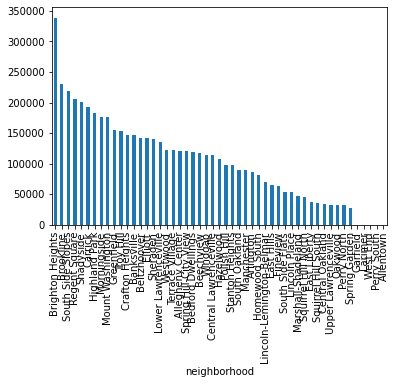

In [16]:
areaOfFieldsPerNeighborhood = fieldAreas.groupby('neighborhood').sum()['fieldArea'].sort_values(ascending=False)
print(areaOfFieldsPerNeighborhood)
areaOfFieldsPerNeighborhood.plot(x='Neighborhoods in Pittsburgh', y='Number of Speedbumps', kind='bar')

Let's put it on a map to see it visually!

In [17]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
fieldArea = neighborhoods.merge(areaOfFieldsPerNeighborhood, how='left', left_on='hood', right_on='neighborhood')

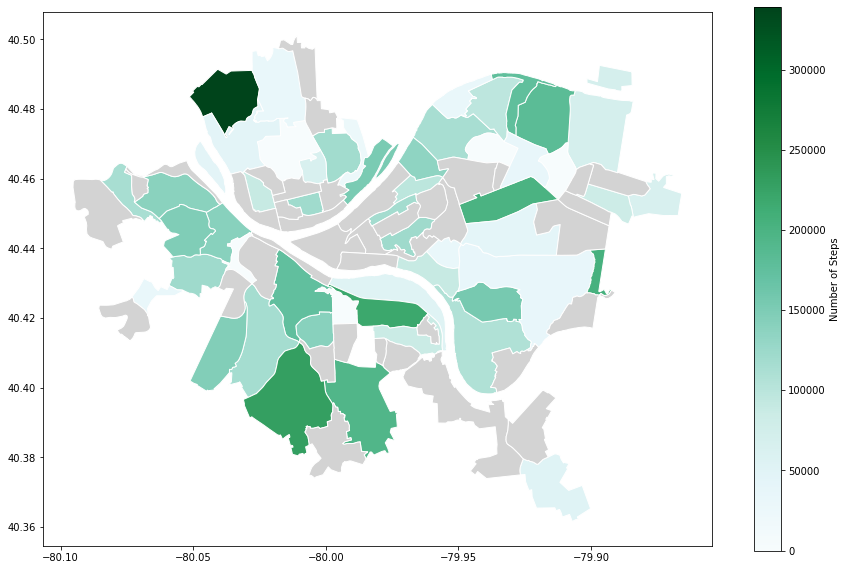

In [18]:
fieldArea.plot(column='fieldArea', # set the data to be used for coloring
               cmap='BuGn',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

It looks like with this metric, Brighton Heights is the best neighborhood to be in when trying to set up camp from aliens!

Now we're going to normalize the metric from the highest one so that we can add the metrics of the number of speed humps and the field area for each neighborhood with equal weight. 

In [22]:
# normalizing based on the highest, speed bumps
speedBumpsPerNeighborhoodLIST = speedBumpsPerNeighborhood.reset_index().values.tolist()
normalizedSpeedBumps = {} 
highestSpeedBump = 18
for i in speedBumpsPerNeighborhoodLIST:
    normalizedSpeedBumps[i[0]] = i[1] / highestSpeedBump    
print(normalizedSpeedBumps)

{'Squirrel Hill South': 1.0, 'Carrick': 0.5, 'Polish Hill': 0.3333333333333333, 'North Oakland': 0.3333333333333333, 'South Side Slopes': 0.2222222222222222, 'Brookline': 0.2222222222222222, 'Upper Hill': 0.2222222222222222, 'Homewood South': 0.2222222222222222, 'Perry North': 0.2222222222222222, 'Squirrel Hill North': 0.16666666666666666, 'South Side Flats': 0.16666666666666666, 'Mount Washington': 0.16666666666666666, 'Garfield': 0.16666666666666666, 'Bloomfield': 0.16666666666666666, 'Highland Park': 0.1111111111111111, 'Central Oakland': 0.05555555555555555, 'Overbrook': 0.05555555555555555, 'Stanton Heights': 0.05555555555555555}


In [23]:
# normalizing based on the highest, field area 
areaOfFieldsPerNeighborhoodLIST = areaOfFieldsPerNeighborhood.reset_index().values.tolist()
normalizedareaOfFields = {}
highestArea = 339082.0
for i in areaOfFieldsPerNeighborhoodLIST:
    normalizedareaOfFields[i[0]] = i[1] / highestArea    
print(normalizedareaOfFields)

{'Brighton Heights': 1.0, 'Brookline': 0.6780070897305077, 'South Side Slopes': 0.6467462147799058, 'Regent Square': 0.6049746079119505, 'Shadyside': 0.5906240968261365, 'Carrick': 0.5705994420228735, 'Highland Park': 0.5385983331465545, 'Morningside': 0.5208327189293446, 'Mount Washington': 0.5183112049592724, 'Greenfield': 0.4576031756330327, 'Troy Hill': 0.45153089813083563, 'Crafton Heights': 0.43389209689691577, 'Banksville': 0.4326151196465752, 'Beltzhoover': 0.41774556007101527, 'Elliott': 0.41656590441250196, 'Sheraden': 0.41228965265039136, 'Lower Lawrenceville': 0.3987265617166349, 'Westwood': 0.3612371048890829, 'Terrace Village': 0.36104835998372076, 'Allegheny Center': 0.35743566452952386, 'Spring Hill-City View': 0.35404415451129817, 'Bedford Dwellings': 0.35035773057844416, 'Beechview': 0.34556537946573396, 'Windgap': 0.337307789856141, 'Central Lawrenceville': 0.3364967765909131, 'Hazelwood': 0.3166756123887437, 'Polish Hill': 0.289561227077816, 'Stanton Heights': 0.287

Now we'll add the metrics together!

In [25]:
# normalizing based on the highest, field area and speedbumps 
normalizedSpeedBumpsArea = {}
for s in normalizedSpeedBumps:
    if s in normalizedareaOfFields:
        normalizedSpeedBumpsArea[s] = normalizedSpeedBumps[s] + normalizedareaOfFields[s]
final = {k: v for k, v in sorted(normalizedSpeedBumpsArea.items(), key=lambda item: item[1])}
print(normalizedSpeedBumpsArea)

{'Squirrel Hill South': 1.1059035867430298, 'Carrick': 1.0705994420228735, 'Polish Hill': 0.6228945604111493, 'South Side Slopes': 0.868968437002128, 'Brookline': 0.9002293119527299, 'Homewood South': 0.46442027461073, 'Perry North': 0.31647670933743327, 'Squirrel Hill North': 0.29865833829771754, 'South Side Flats': 0.3261561116976621, 'Mount Washington': 0.684977871625939, 'Garfield': 0.16666666666666666, 'Highland Park': 0.6497094442576656, 'Central Oakland': 0.15539866135297328, 'Stanton Heights': 0.3426365566113474}


By combining the metrics, we can see that Squirrel Hill South is the best neighborhod when it comes to running away from aliens and setting up shelter from aliens!

We can see from the data analysis that the drawbacks to the data is that there are only 18 neighborhoods that have speed humps recorded in the dataset versus 51 that have recorded playing fields. This means that there are 33 neighborhoods that had to be cut in order to combine the metrics since it 